## RNN demo code from text section 3.10.1
 

In [12]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [13]:
# Simple RNN
class RNN(torch.nn.Module):
    def __init__(self, inputSize, hiddenStateSize, outputSize):
        super(RNN, self).__init__()  # inheritance from torch.nn.Module
        self.rnn = torch.nn.RNN(inputSize, hiddenStateSize,
                                nonlinearity='relu', num_layers=6)
        self.linear = torch.nn.Linear(hiddenStateSize, outputSize)

    def forward(self, x):
        h, _ = self.rnn(x)  # unrolls the RNN
        y = self.linear(h)  # transforms hidden layer to output layer
        return y

Train an RNN to predict what the cube of the input values are

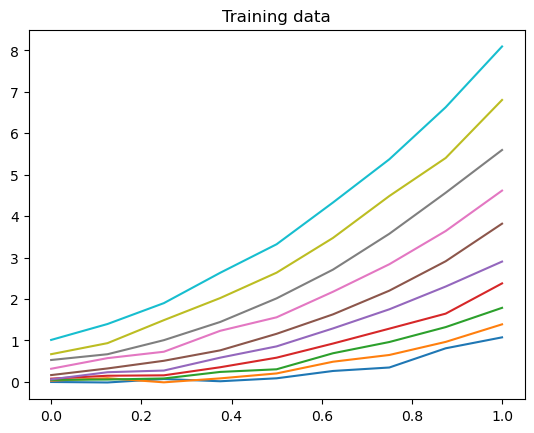

In [14]:
sequenceLength = 8
inputSize = 1  # and output size
hiddenStateSize = 200
numberOfSequences = 10  # or number of training samples

# training data
t0 = torch.linspace(0, 1, numberOfSequences)
t = torch.linspace(0, 1, sequenceLength + 1)
t, t0 = torch.meshgrid(t, t0, indexing='ij')
y = (t0 + t) ** 3 
y = (y + np.random.normal(0, .05, size=t.shape) ).to(torch.float32)

plt.plot(t,y)
plt.title('Training data')

y = y.unsqueeze(-1)
x = y[:-1]  # (sequenceLength, numberOfSequences, inputSize)
y = y[1:]  # (sequenceLength, numberOfSequences, outputSize)

model = RNN(inputSize, hiddenStateSize, inputSize)

yPred = model(x)  # prediction
cost = torch.mean((yPred - y) ** 2)  # cost

In [15]:
# hyperparameters
lr = 1e-3
epochs = 200
batchSize = 3  # 1 for SGD and numberOfSequences for full-batch

dataset = torch.utils.data.TensorDataset(x, y)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batchSize, shuffle=True)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

# training loop
for epoch in range(epochs):
    for xBatch, yBatch in dataloader:
        yBatchPred = model(xBatch)  # forward propagation
        cost = 0.5 * torch.mean((yBatchPred - yBatch) ** 2)
        cost.backward()  # backward propagation
        optimizer.step()  # gradient descent update
        optimizer.zero_grad()  # reset gradients
print(f"final cost: {cost}")

final cost: 0.040369655936956406


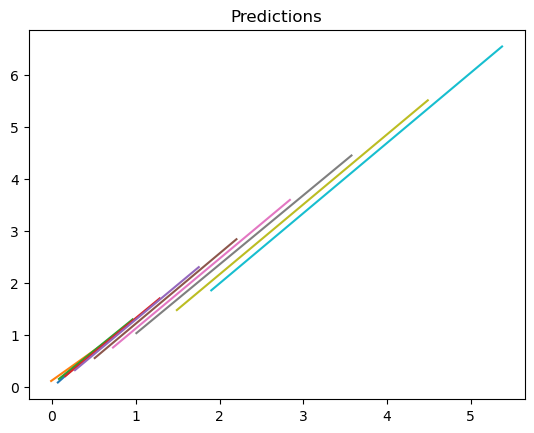

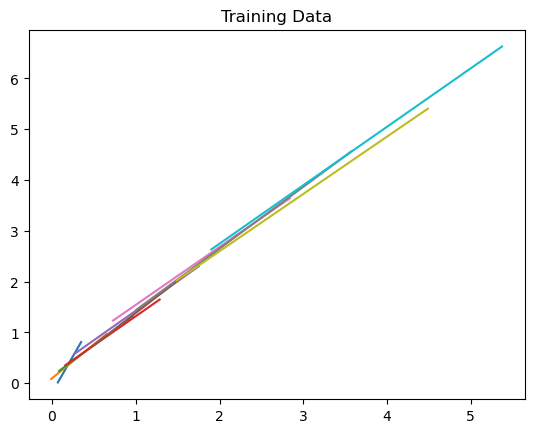

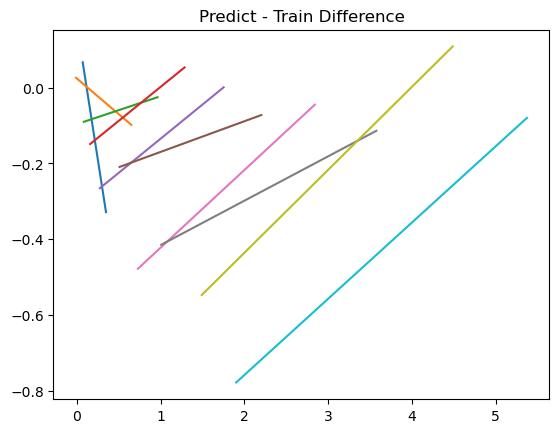

In [16]:
plt.plot(xBatch[:,:,0], yBatchPred[:,:,0].detach())
plt.title('Predictions')
plt.show()
plt.plot(xBatch[:,:,0], yBatch[:,:,0])
plt.title('Training Data')
plt.show()
plt.plot(xBatch[:,:,0], yBatchPred[:,:,0].detach()-yBatch[:,:,0])
plt.title('Predict - Train Difference')
plt.show()